In [40]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [41]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape
# filter to match
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]


In [42]:
def load_run(n_components, date):
    clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
    clusters_ambig =  pd.read_csv("output/cluster_"+str(n_components)+"_ambiguousNaN_"+date+".csv", index_col=0)
    mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
    symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)
    preddf = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_preddf.csv", index_col=0)
    file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

    with open(file_path, 'rb') as file:
        model = pkl.load(file)
    return({"clusters": clusters, "mm": mm, "symp_unusual": symp_unusual, "model": model, 'clusters_ambig': clusters_ambig, 'preddf':preddf})

In [43]:
n_components = 13
date = "111023"

res = load_run(n_components, date)

In [44]:
df['cluster'] = res['clusters']['cluster']

In [45]:
df['cluster_ambig'] = res['clusters_ambig']['cluster']

In [16]:
# for each cluster plot the fraction of each value of Flag_MECFS
df['Flag_MECFS'] = df['Flag_MECFS'].astype('category')
df['cluster'] = df['cluster'].astype('category')




In [64]:
def plot_flag(compare_var, df, cluscol = 'cluster'):
    # Assuming df is your DataFrame
    df[compare_var] = df[compare_var].astype('category')
    df[cluscol] = df[cluscol].astype('category')

    # Create a DataFrame to store the counts
    cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)

    # Plot the stacked bar chart
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))

    # Define the colors for each 'Flag_MECFS' value
    colors = sns.color_palette('husl', n_colors=len(df[compare_var].unique()))

    # Plot the stacked bars
    cluster_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of '+compare_var+ ' for each Cluster')

    # Display the legend
    plt.legend(title=compare_var, bbox_to_anchor=(1.05, 1), loc='upper left')

    #plt.legend(title=compare_var)

    # Show the plot
    plt.show()


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/388024100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

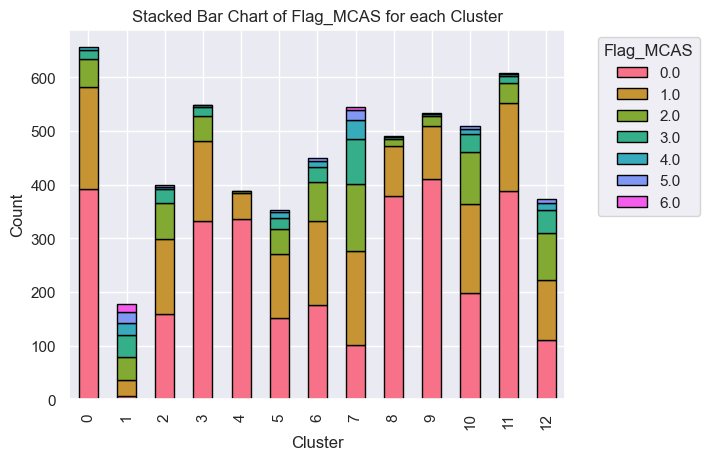

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/388024100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

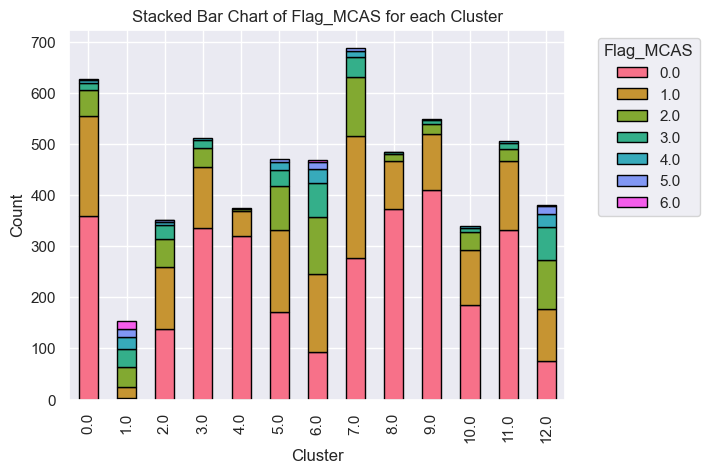

In [66]:
plot_flag("Flag_MCAS", df)
plot_flag("Flag_MCAS", df, cluscol="cluster_ambig")

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/388024100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

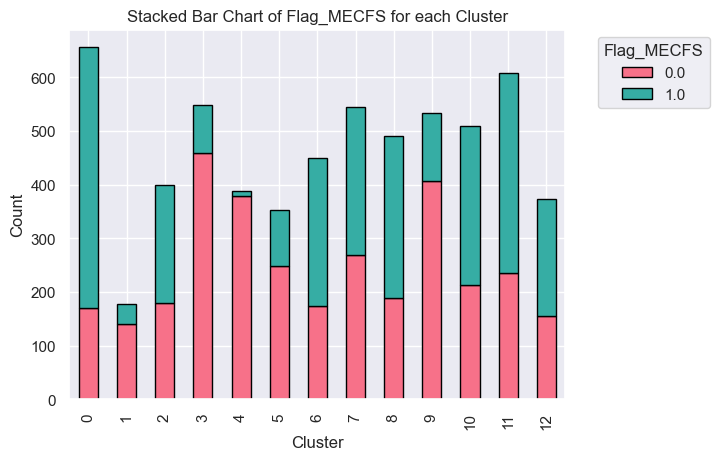

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/388024100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

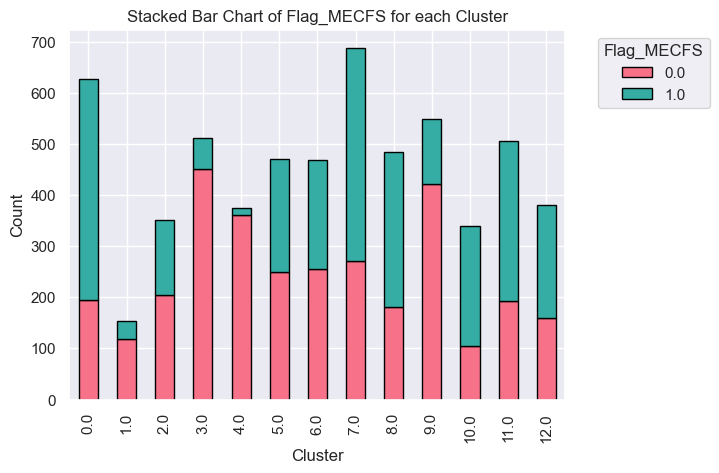

In [67]:
plot_flag("Flag_MECFS", df)
plot_flag("Flag_MECFS", df, cluscol="cluster_ambig")

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

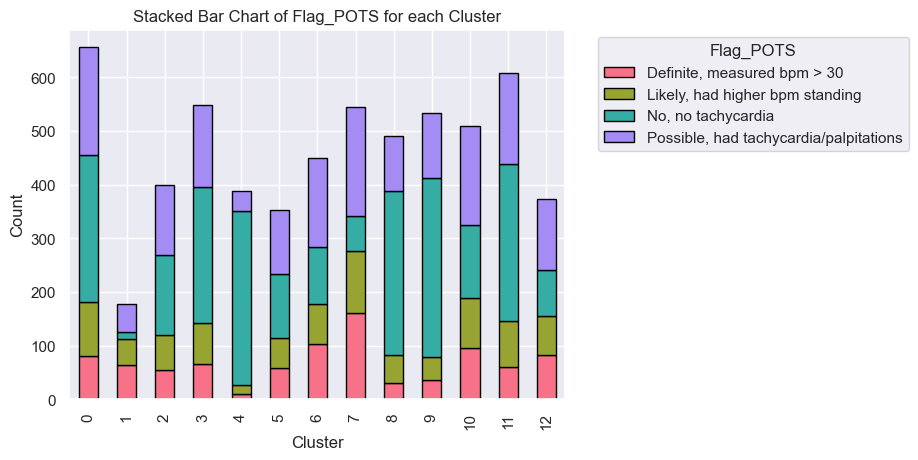

In [48]:
plot_flag("Flag_POTS", df)

In [51]:
print(df.columns.values)

['Symptom_Memory_short' 'Symptom_Memory_long'
 'Symptom_Memory_no_new_memories' 'Symptom_Memory_forget_tasks'
 'Symptom_Memory_other' 'Symptom_Cognitive_Functioning_thinking'
 'Symptom_Cognitive_Functioning_executive'
 'Symptom_Cognitive_Functioning_problemsolving'
 'Symptom_Cognitive_Functioning_slowedthoughts'
 'Symptom_Cognitive_Functioning_fastthoughts'
 'Symptom_Cognitive_Functioning_agnosia'
 'Symptom_Cognitive_Functioning_attentionconcentration'
 'Symptom_Cognitive_Functioning_other'
 'Symptom_Speech_difficulty_finding_words'
 'Symptom_Speech_difficulty_communicating_verbally'
 'Symptom_Speech_difficulty_reading_processing_text'
 'Symptom_Speech_difficulty_understanding_others_speech'
 'Symptom_Speech_difficulty_speaking_complete_sentences'
 'Symptom_Speech_speaking_unrecognizable_words'
 'Symptom_Speech_difficulty_communicating_writing'
 'Symptom_Speech_changes_to_secondary_languages' 'Symptom_Speech_other'
 'Symptom_Headaches_behind_eyes' 'Symptom_Headaches_stiff_neck'
 'Sympt

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

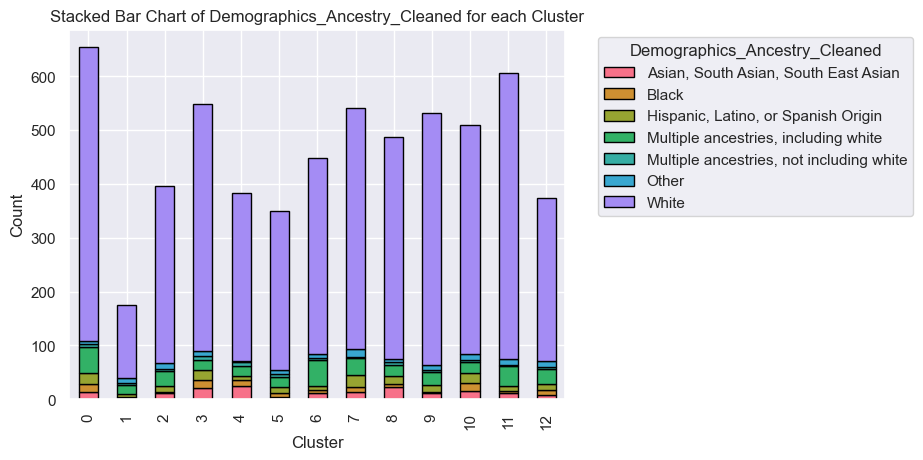

In [52]:
plot_flag("Demographics_Ancestry_Cleaned", df)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

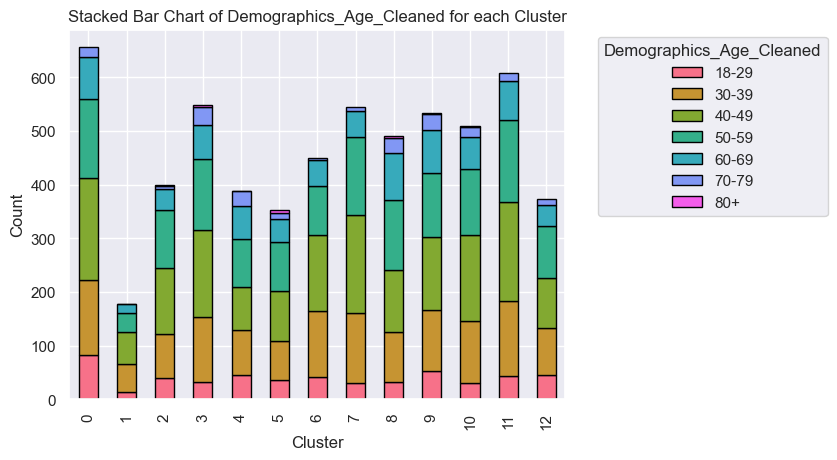

In [53]:
plot_flag("Demographics_Age_Cleaned", df)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

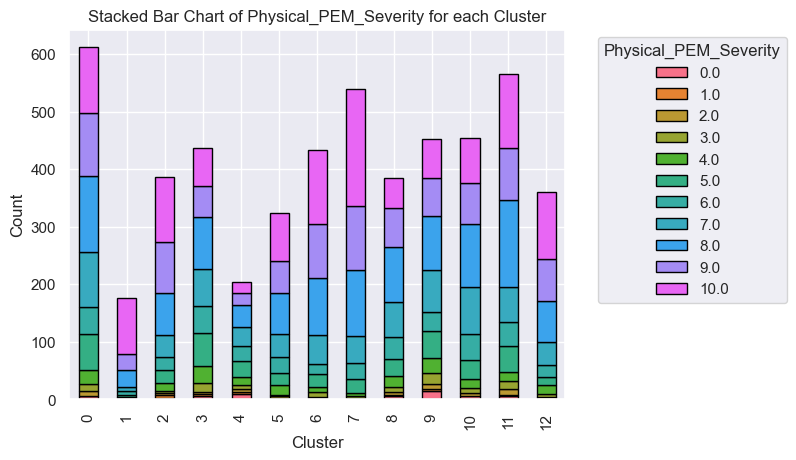

In [56]:
plot_flag("Physical_PEM_Severity", df)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

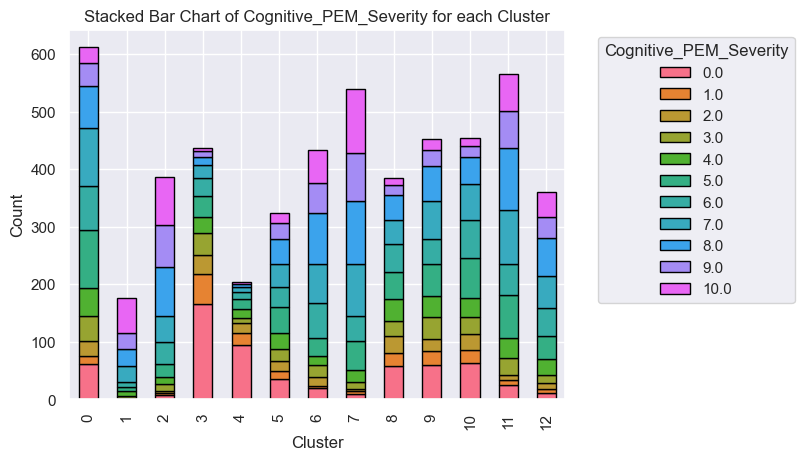

In [59]:
plot_flag("Cognitive_PEM_Severity", df)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_8756/1781738800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby(['cluster', compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

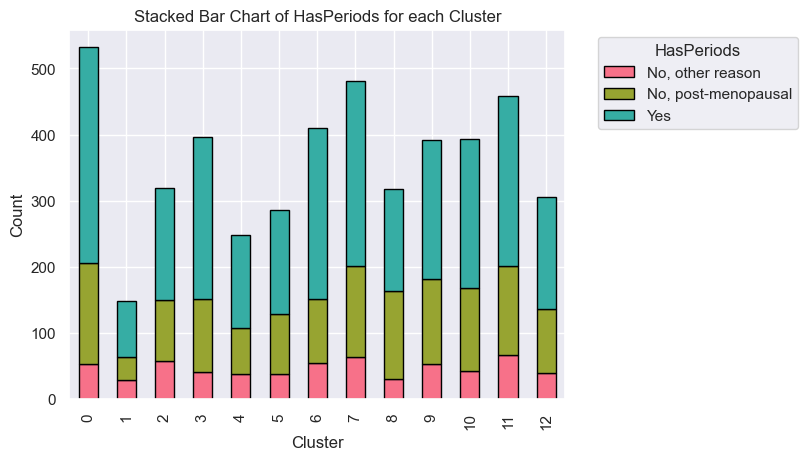

In [60]:
plot_flag("HasPeriods", df)